In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv")

In [32]:
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [34]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
continuous_features = [feature for feature in numerical_features if feature not in numerical_features]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

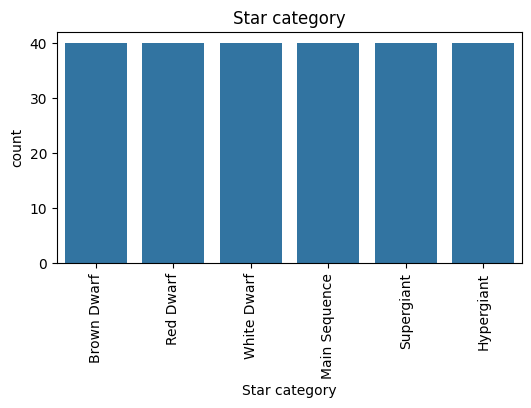

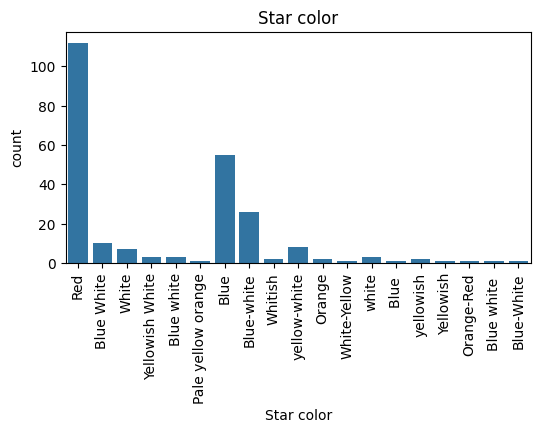

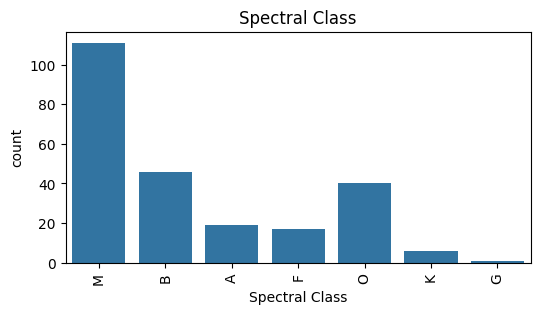

In [35]:

for feature in categorical_features:
    plt.figure(figsize=(6,3), dpi=100)
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=feature)
    plt.title(feature)

In [36]:
df.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

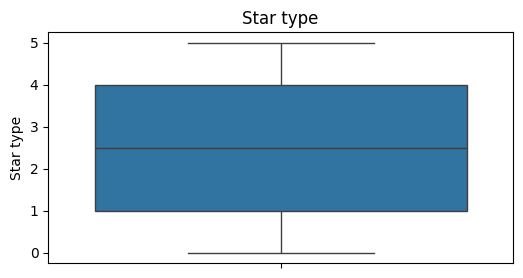

In [37]:
for feature in discrete_features:
    plt.figure(figsize=(6,3), dpi = 100)
    sns.boxplot(df[feature])
    plt.title(feature)

In [38]:
categorical_features

['Star category', 'Star color', 'Spectral Class']

<Axes: xlabel='Temperature (K)', ylabel='Star category'>

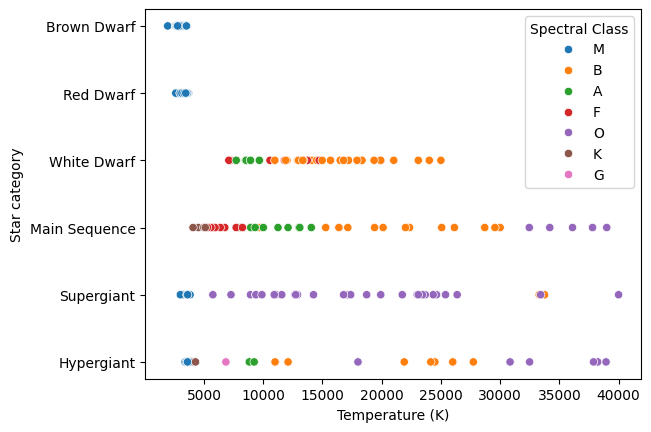

In [42]:
sns.scatterplot(x='Temperature (K)', y="Star category", data=df, hue="Spectral Class")

<Axes: xlabel='Temperature (K)', ylabel='Star color'>

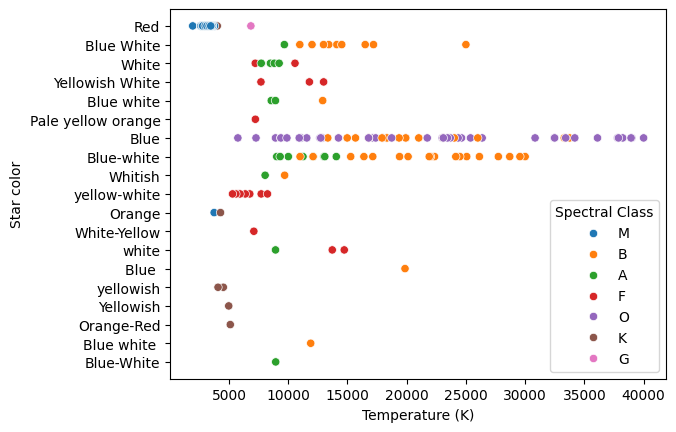

In [43]:
sns.scatterplot(x='Temperature (K)', y="Star color", data=df, hue="Spectral Class")

<Axes: xlabel='Luminosity (L/Lo)', ylabel='Star category'>

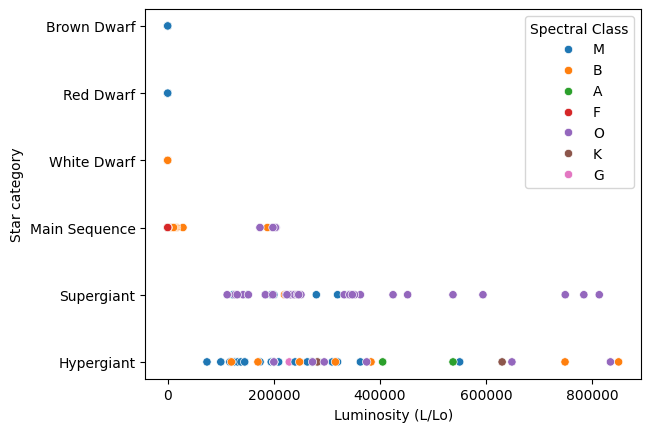

In [44]:
sns.scatterplot(x='Luminosity (L/Lo)', y="Star category", data=df, hue="Spectral Class")

<Figure size 900x600 with 0 Axes>

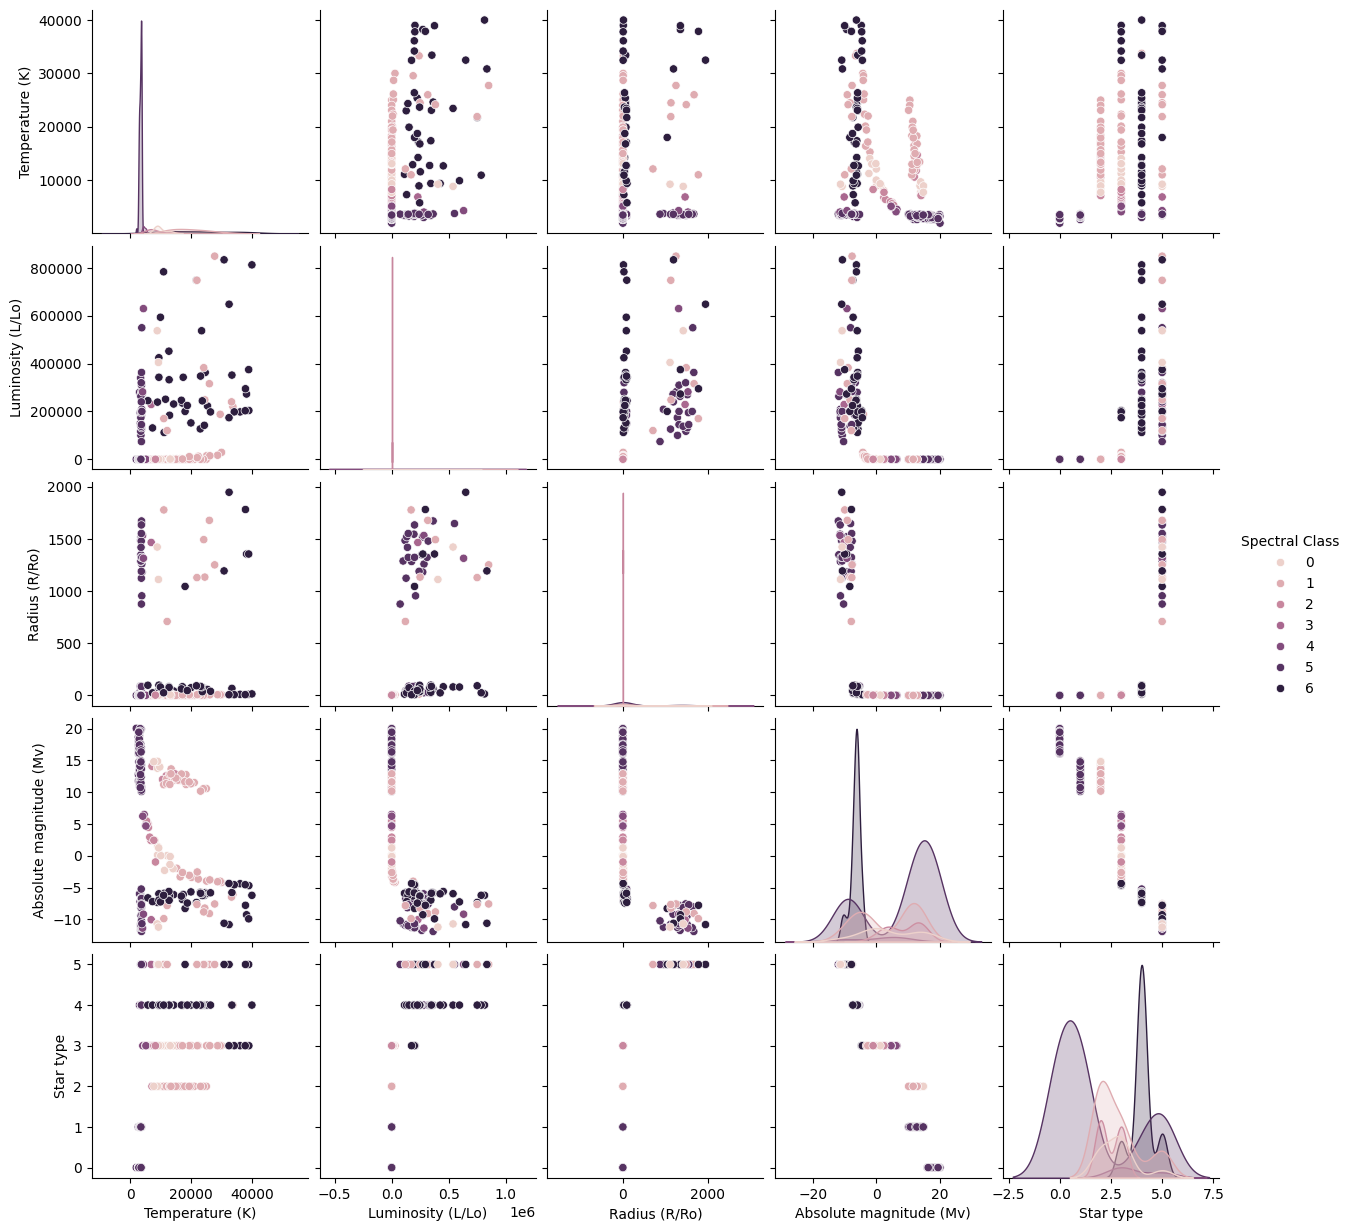

In [87]:
plt.figure(figsize=(6, 4), dpi=150)
sns.pairplot(data=df[numerical_features + ["Spectral Class"]], hue="Spectral Class")

<Axes: >

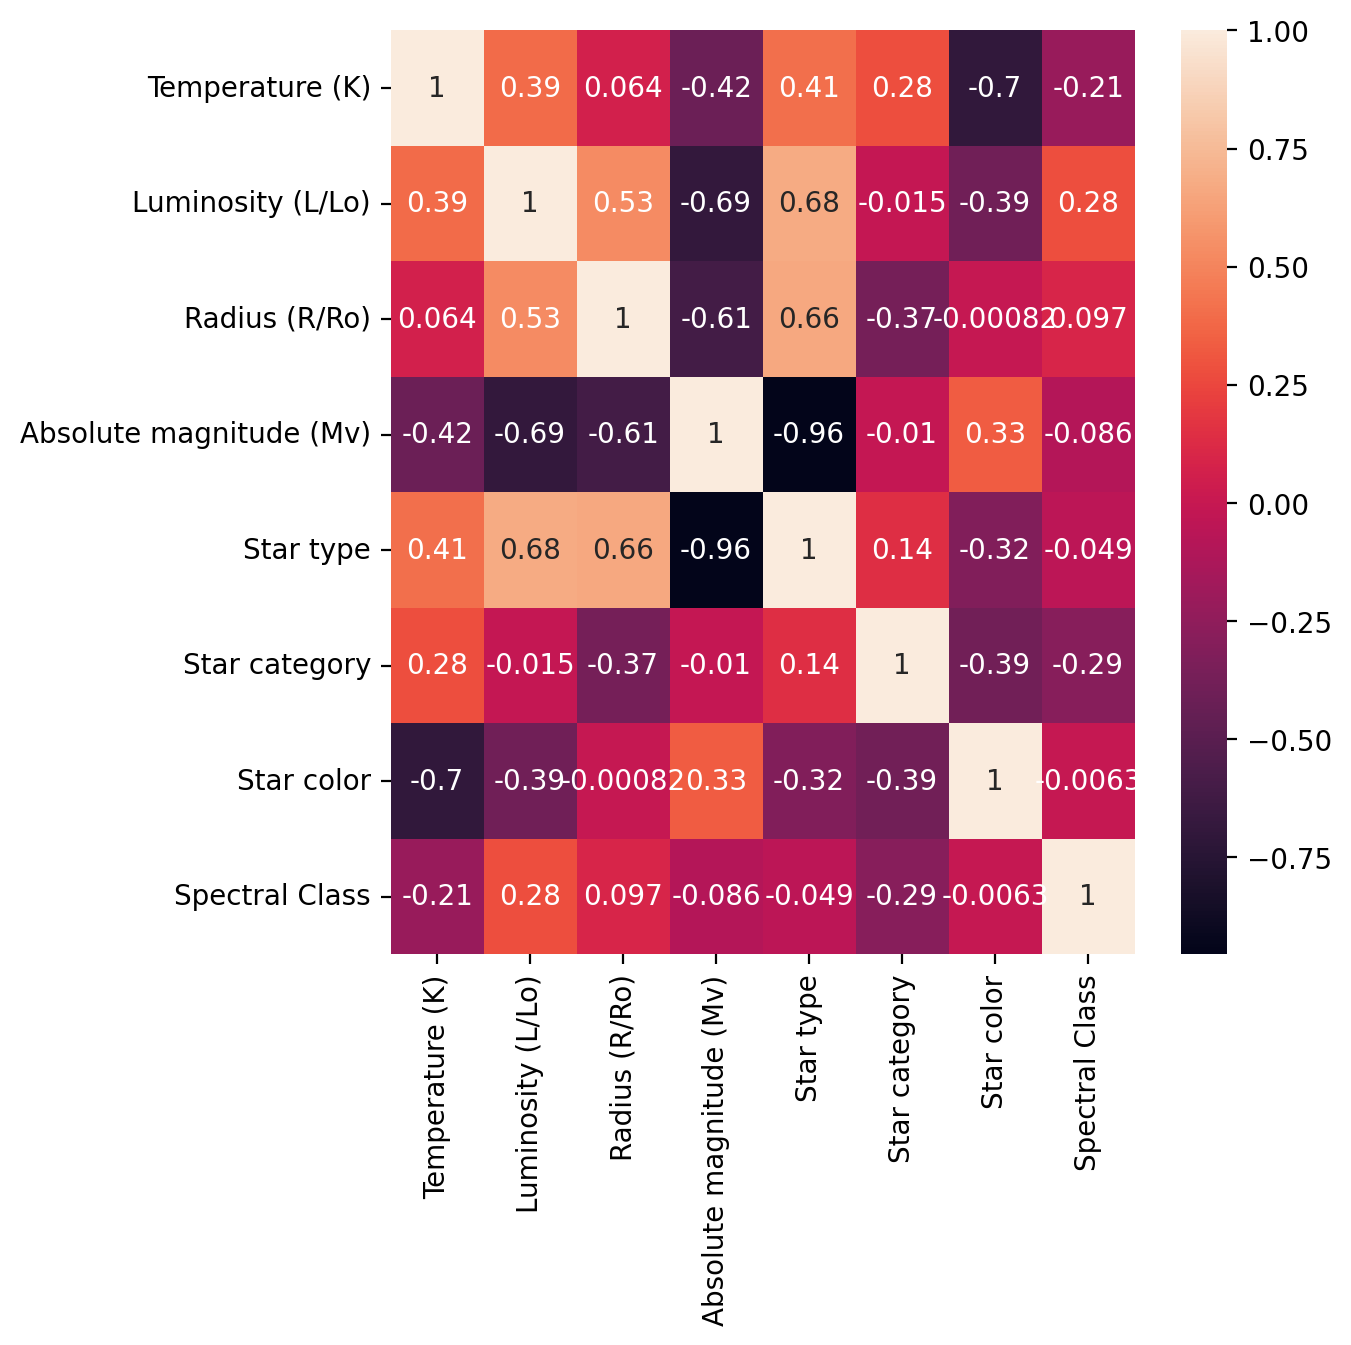

In [90]:
plt.figure(figsize=(6,6), dpi=200)
sns.heatmap(df.corr(), annot=True)

<hr>

# Model Training

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

In [46]:
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,10,5
1,3042,0.000500,0.1542,16.60,0,0,10,5
2,2600,0.000300,0.1020,18.70,0,0,10,5
3,2800,0.000200,0.1600,16.65,0,0,10,5
4,1939,0.000138,0.1030,20.06,0,0,10,5
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,6
236,30839,834042.000000,1194.0000,-10.63,5,1,0,6
237,8829,537493.000000,1423.0000,-10.73,5,1,11,0
238,9235,404940.000000,1112.0000,-11.23,5,1,11,0


In [48]:
X = df.drop("Spectral Class", axis=1)
y = df["Spectral Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

<hr>

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()

knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [51]:
y_preds = knn.predict(scaled_X_test)

<Axes: >

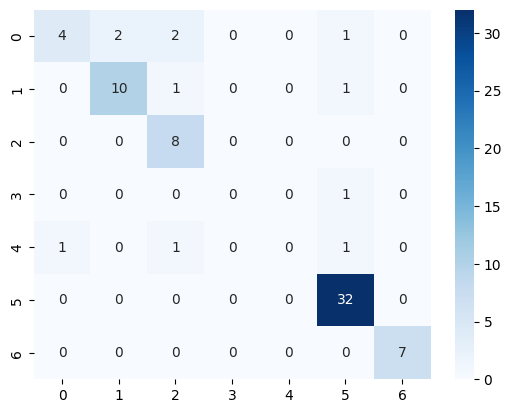

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
y_preds

In [65]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.83      0.83      0.83        12
           2       0.67      1.00      0.80         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.89      1.00      0.94        32
           6       1.00      1.00      1.00         7

    accuracy                           0.85        72
   macro avg       0.60      0.61      0.59        72
weighted avg       0.81      0.85      0.81        72



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr>

# LDA

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(scaled_X_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
y_preds = lda.predict(scaled_X_test)

<Axes: >

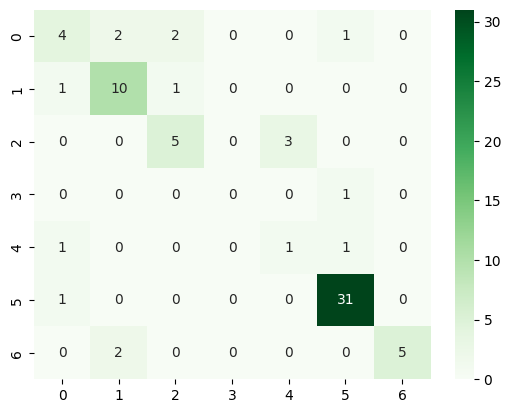

In [71]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap="Greens")

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.71      0.83      0.77        12
           2       0.62      0.62      0.62         8
           3       0.00      0.00      0.00         1
           4       0.25      0.33      0.29         3
           5       0.91      0.97      0.94        32
           6       1.00      0.71      0.83         7

    accuracy                           0.78        72
   macro avg       0.58      0.56      0.56        72
weighted avg       0.77      0.78      0.77        72



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr>

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(scaled_X_train, y_train)

LogisticRegression()

In [74]:
y_preds = lr.predict(scaled_X_test)

<Axes: >

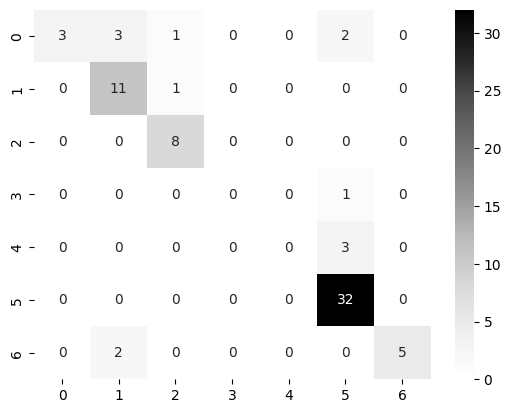

In [80]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap="Grays")

In [81]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.69      0.92      0.79        12
           2       0.80      1.00      0.89         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.84      1.00      0.91        32
           6       1.00      0.71      0.83         7

    accuracy                           0.82        72
   macro avg       0.62      0.57      0.56        72
weighted avg       0.80      0.82      0.78        72



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr>

# Naive Bayes

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.82      0.75      0.78        12
           2       0.33      1.00      0.50         8
           3       0.00      0.00      0.00         1
           4       1.00      0.33      0.50         3
           5       1.00      0.75      0.86        32
           6       1.00      1.00      1.00         7

    accuracy                           0.74        72
   macro avg       0.71      0.61      0.60        72
weighted avg       0.86      0.74      0.76        72



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


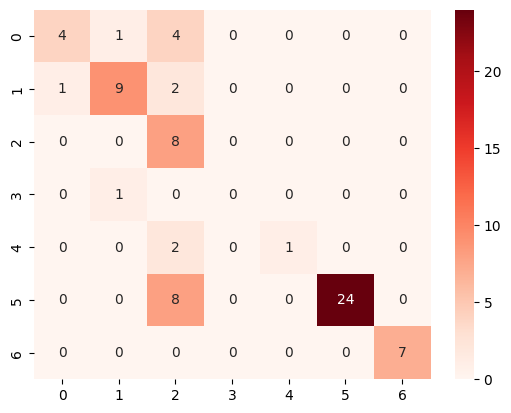

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(scaled_X_train, y_train)
y_preds = nb.predict(scaled_X_test)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap="Reds")

print(classification_report(y_test, y_preds))

<hr>

# SVC

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.85      0.92      0.88        12
           2       0.67      1.00      0.80         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.91      1.00      0.96        32
           6       1.00      1.00      1.00         7

    accuracy                           0.86        72
   macro avg       0.60      0.62      0.60        72
weighted avg       0.82      0.86      0.83        72



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


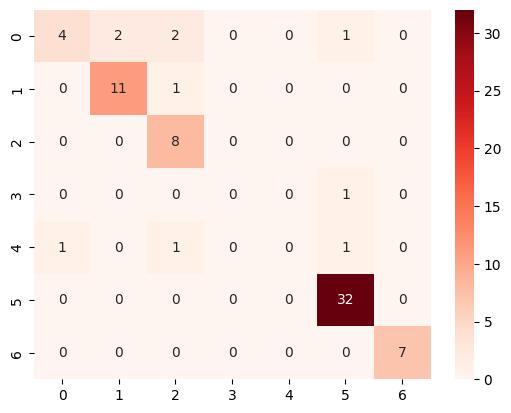

In [83]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(scaled_X_train, y_train)
y_preds = svc.predict(scaled_X_test)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap="Reds")

print(classification_report(y_test, y_preds))

<hr>